In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   

<IPython.core.display.Javascript object>


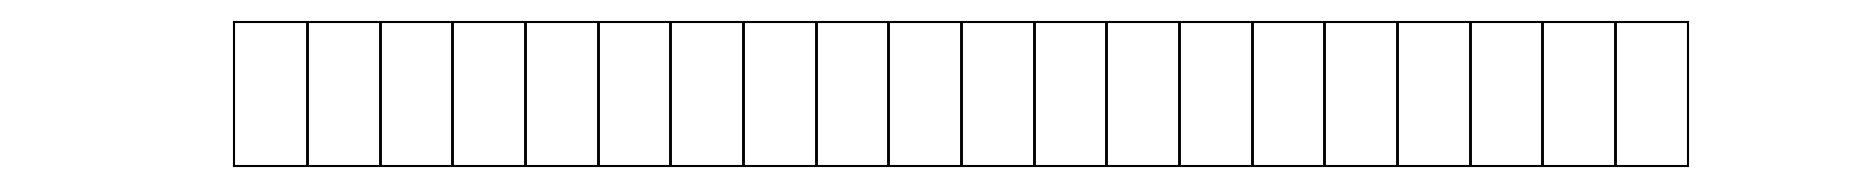

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
# 创建图像
fig = plt.figure(figsize=(10,1))
numofcell = 20     # length of road (circle)
numofcar = 12      # number of cars 
max_time = 100     # timestep 
max_speed = 5      # v_max 
p_slowdown = 0.3   # p_slowdown 
pause_time = 0.1   # refresh time 
cell_size = 15     # size of cell (how big it is)

In [19]:
# 函数：构建一维空间

def Plot_Space():
    # 绘制每个单元格的分界线
    for i in range(1, numofcell):
        plt.plot([i-0.5, i-0.5], [-0.5, 0.5], '-k', linewidth=0.5)
    
    # 设置图表的坐标轴范围
    plt.axis([-0.5, numofcell-0.5, -0.5, 0.5])
    
    # 移除X轴和Y轴的刻度
    plt.xticks([])
    plt.yticks([])



In [20]:
def get_empty_front(link, numofcell, indexofcell):
    """
    函数：获取和前车的距离
    :param link: 包含车辆位置信息的列表
    :param numofcell: humber of cells 
    :param indexofcell: 当前车辆的索引位置
    :return: 当前车辆与前车之间的空单元格数量
    """
    link2 = link * 2
    num = 0  # empty cell 
    i = 1  # check 

    # find non-empty cell 
    while link2[indexofcell + i] is None:
        num += 1
        i += 1

    return num


<IPython.core.display.Javascript object>


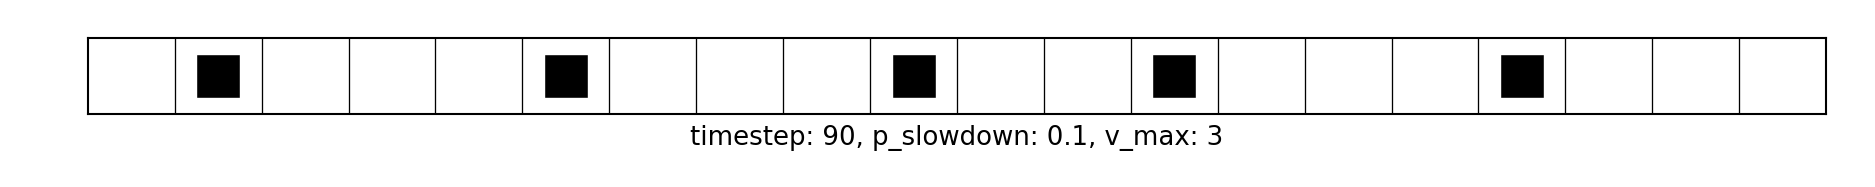

In [102]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# randomalize 
numofcell = 20     # length of road (circle)
numofcar = 5       # number of cars 
max_time = 100     # timestep 
max_speed = 3      # v_max 
p_slowdown = 0.1   # p_slowdown 
pause_time = 0.1   # refresh time 
cell_size = 15     # size of cell (how big it is)

# randomlize 
link = [None] * numofcell
num = 0
while num != numofcar:
    sj = random.randint(0, numofcell - 1)
    if link[sj] is None:
        link[sj] = random.randint(0, max_speed)
        num += 1

# update the function 
def update(frame):
    global link
    for cell in range(numofcell):
        if link[cell] is not None:
            # acceleration 
            link[cell] = min(link[cell] + 1, max_speed)
            # braking 
            link[cell] = min(link[cell], get_empty_front(link, numofcell, cell))
            # slow down 
            if random.random() <= p_slowdown:
                link[cell] = max(link[cell] - 1, 0)
    # update the place 
    nlink = [None] * numofcell
    for cell in range(numofcell):
        if link[cell] is not None:
            new_index = cell + link[cell]
            if new_index >= numofcell:
                new_index -= numofcell
            nlink[new_index] = link[cell]
    link = nlink

    x1 = [i for i in range(len(link)) if link[i] is not None]
    ax.clear()
    Plot_Space()
    ax.plot(x1, [0] * len(x1), 'sk', markersize=cell_size)
    #ax.set_xlabel('timestep: ' + str(frame))
    ax.set_xlabel(f'timestep: {frame}, p_slowdown: {p_slowdown}, v_max: {max_speed}')


fig, ax = plt.subplots(figsize=(10, 1))
ani = animation.FuncAnimation(fig, update, frames=max_time, repeat=True)
plt.tight_layout()
ani.save(f'E:\\UvA 课程\\complex simulation\\Project complex system\\CSS code\\traffic_simulation_density={numofcar/numofcell}_vmax={max_speed}_pslow={p_slowdown}.gif', writer='pillow', fps=10)
plt.show()


In [101]:
# exit和entry怎么计数
# 怎么找critical 
# SOC的表现
